#Submission Machine Learnis Kelas Pemula

Di buat oleh
* Nama : Ibnu Harsa Anshory
* Email : ibnu.harsa@gmail.com
* Kota : Jakarta
* No Hp : +6282389207994
* Linkedin : https://www.linkedin.com/in/ibnu-harsa-anshory/
* Dataset : rockpaperscissors , Sumber : https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

#Import Library yang akan di gunakan

In [90]:
import os
import pandas as pd
import tensorflow as tf
from imutils import paths
import matplotlib.pyplot as plt
import cv2 as cv
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg

%matplotlib inline

# Load dataset

In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip 
  

--2020-11-05 20:56:33--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  5.00MB/s    in 49s     

2020-11-05 20:57:23 (6.33 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
#Unzip data
zip_path = '/content/rockpaperscissors.zip'
!unzip -q /content/rockpaperscissors.zip -d /content
!rm /content/rockpaperscissors.zip

In [5]:
#Penamaan variabel yang akan di gunakan
data = '/content/rockpaperscissors/rps-cv-images'

In [6]:
#Cek direktori data
os.listdir(data)

['rock', 'paper', 'README_rpc-cv-images.txt', 'scissors']

In [7]:
#Menghapus folder yang tidak di butuhkan
!rm /content/rockpaperscissors/rps-cv-images/README_rpc-cv-images.txt

In [12]:
#Mengecek kembali direktori data
os.listdir(data)

['rock', 'paper', 'scissors']

# Menampilkan contoh data yang akan di gunakan

In [66]:
#Melihat jumlah data 
data_rock = os.listdir('/content/rockpaperscissors/rps-cv-images/rock')
data_paper = os.listdir('/content/rockpaperscissors/rps-cv-images/paper')
data_scissors = os.listdir('/content/rockpaperscissors/rps-cv-images/scissors')

print("rock:",len(data_rock))
print("paper:",len(data_paper))
print("scissors:",len(data_scissors))

rock: 726
paper: 712
scissors: 750


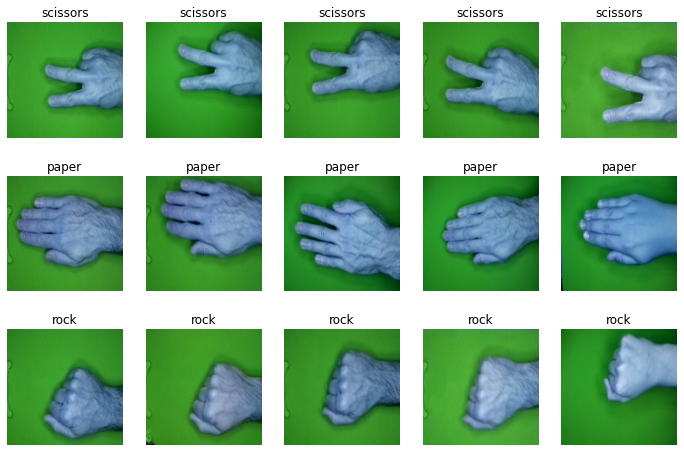

In [11]:
# data scissors
img_scissors = '/content/rockpaperscissors/rps-cv-images/scissors'
img_scissors_list = list(paths.list_images(img_scissors))

# data paper
img_paper = '/content/rockpaperscissors/rps-cv-images/paper'
img_paper_list = list(paths.list_images(img_paper))

# data rock
img_rock = '/content/rockpaperscissors/rps-cv-images/rock'
img_rock_list = list(paths.list_images(img_rock))

fig, ax = plt.subplots(ncols=5, nrows=3, figsize=(12, 8))

for i in range(5):
  image_scissors = cv.imread(img_scissors_list[i])
  scissors_resize = cv.resize(image_scissors, (128,128))
  ax[0, i].imshow(scissors_resize)
  ax[0, i].set_title('scissors')
  ax[0, i].axis(False)

  image_paper = cv.imread(img_paper_list[i])
  paper_resize = cv.resize(image_paper, (128,128))
  ax[1, i].imshow(paper_resize)
  ax[1, i].set_title('paper')
  ax[1, i].axis(False)

  image_rock = cv.imread(img_rock_list[i])
  rock_resize = cv.resize(image_rock, (128,128))
  ax[2, i].imshow(rock_resize)
  ax[2, i].set_title('rock')
  ax[2, i].axis(False)

# Data preprocessing

In [16]:
image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode = 'nearest',
    validation_split=0.4) # set validation split 0.4(40%)
    

In [27]:
train_generator = image_generator.flow_from_directory(
    data,
    target_size=(128, 128),
    batch_size=50,
    shuffle=True,
    class_mode='categorical',
    subset='training') # as a training data

validation_generator = image_generator.flow_from_directory(
    data,
    target_size=(128, 128),
    batch_size=50,
    shuffle=True,
    class_mode='categorical',
    subset='validation') # as a validation data

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [67]:
train_generator.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

In [79]:
validation_generator.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

#Membangun arsitektur model

In [18]:
#Membuat model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax') #Output sesuai class
])

#Melatih model

In [19]:
#compile model menggunakan optimizer RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])

In [35]:
#Membuat chekpoint dan callback
filepath='weights.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [36]:
history_model = model.fit(
    train_generator,  
    validation_data=validation_generator,
    verbose = 1, 
    callbacks=callbacks_list, 
    epochs=30   
)

Epoch 1/30
27/27 [==============================] - ETA: 0s - loss: 0.0530 - accuracy: 0.9909
Epoch 00001: val_accuracy improved from -inf to 0.98970, saving model to weights.h5
27/27 [==============================] - 13s 466ms/step - loss: 0.0530 - accuracy: 0.9909 - val_loss: 0.0448 - val_accuracy: 0.9897
Epoch 2/30
27/27 [==============================] - ETA: 0s - loss: 0.0260 - accuracy: 0.9924
Epoch 00002: val_accuracy did not improve from 0.98970
27/27 [==============================] - 12s 442ms/step - loss: 0.0260 - accuracy: 0.9924 - val_loss: 0.0947 - val_accuracy: 0.9794
Epoch 3/30
27/27 [==============================] - ETA: 0s - loss: 0.0749 - accuracy: 0.9795
Epoch 00003: val_accuracy did not improve from 0.98970
27/27 [==============================] - 12s 442ms/step - loss: 0.0749 - accuracy: 0.9795 - val_loss: 0.0866 - val_accuracy: 0.9783
Epoch 4/30
27/27 [==============================] - ETA: 0s - loss: 0.0275 - accuracy: 0.9901
Epoch 00004: val_accuracy did not 

#Visualisasi

In [37]:
#Membuat Fungsi untuk visualisasi
def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.grid(True)

def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)  

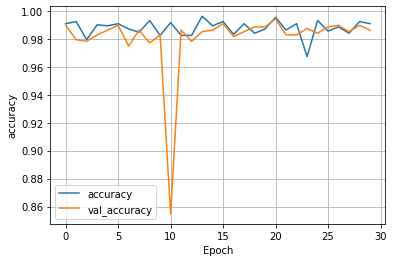

In [38]:
#Menampilkan grafik cccuracy
plot_accuracy(history_model)

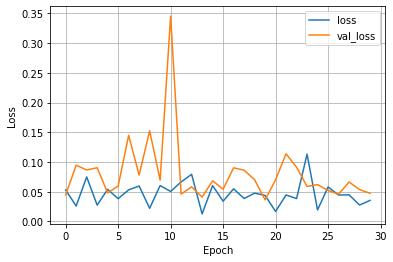

In [39]:
#Menampilkan grafik loss
plot_loss(history_model)

#Prediksi gambar

In [91]:
#Loading model
model_filename = '/content/weights.h5' #load weights dari model yang telah kita simpan sebelumnya

model.load_weights(model_filename)
model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [107]:
#Membuat fungsi untuk predict gambar
def predict_gambar():
  uploaded = files.upload()

  for fn in uploaded.keys():
 
    # predicting images
    path = fn
    img = image.load_img(path, target_size=(128,128))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images)
  
    print(fn)
    if classes[0][0]==1:
      plt.title("paper")
    elif classes[0][1]==1:
      plt.title("rock")
    else:
      plt.title("scissors")

Saving 1Dfw5FRlS4h60JPX.png to 1Dfw5FRlS4h60JPX (3).png
1Dfw5FRlS4h60JPX.png


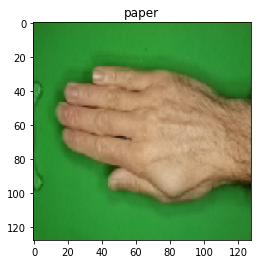

In [108]:
predict_gambar()

Saving 1BqjHe5igJAgUjiN.png to 1BqjHe5igJAgUjiN (1).png
1BqjHe5igJAgUjiN.png


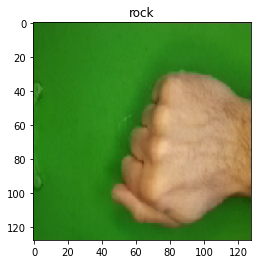

In [109]:
predict_gambar()

Saving 1jKhi65BPTLXnUI6.png to 1jKhi65BPTLXnUI6 (1).png
1jKhi65BPTLXnUI6.png


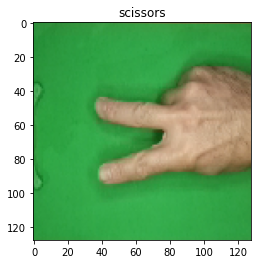

In [110]:
predict_gambar()